## Clustering

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df = df.dropna()
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded = df_encoded.reset_index()
df_encoded.drop(['index', 'id'], axis=1, inplace=True)

K-Means
--

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


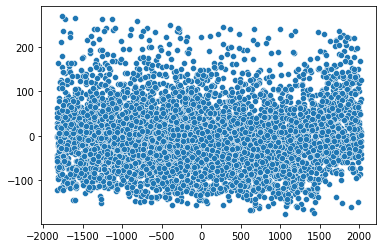

In [ ]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_encoded)
sns.scatterplot(df_pca[:, 0], df_pca[:, 1])
plt.show()

In [ ]:
def k_means(data, n_clusters):
  k_means = KMeans(n_clusters=n_clusters, max_iter=50, random_state=1)
  k_means.fit(data)
  labels = k_means.labels_
  centroids = k_means.cluster_centers_
  pd.DataFrame(centroids)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
  sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="*", color="g", s=500)
  plt.show()

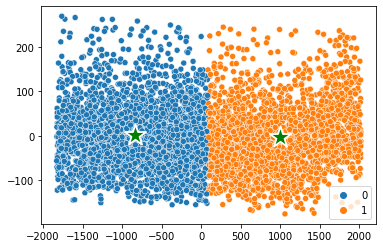

In [ ]:
k_means(df_pca, 2)

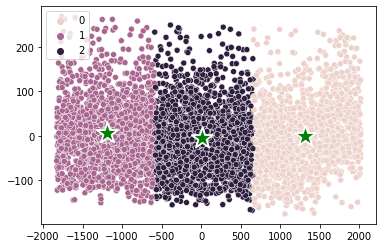

In [ ]:
k_means(df_pca, 3)

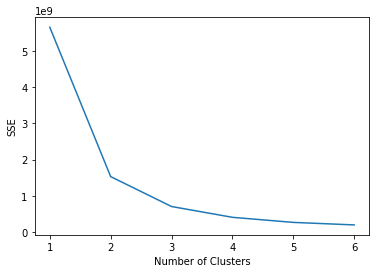

In [ ]:
numClusters = 7
SSE = []
silhouette_coefficients = []
for k in range(1, numClusters):
  k_means = KMeans(n_clusters=k)
  k_means.fit(df_encoded)
  SSE.append(k_means.inertia_)
  if k<=1:
    continue
  score = silhouette_score(df_encoded, k_means.labels_)
  silhouette_coefficients.append(score)

plt.plot(range(1, numClusters), SSE);
plt.xlabel('Number of Clusters');
plt.ylabel('SSE');

In [ ]:
!pip install --upgrade kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, numClusters), SSE, curve="convex", direction="decreasing")
kl.elbow

2

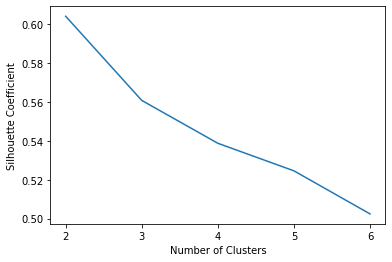

In [ ]:
plt.plot(range(2, numClusters), silhouette_coefficients)
plt.xticks(range(2, numClusters))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Hierarchical/ Agglomerative Clustering
--

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2
1


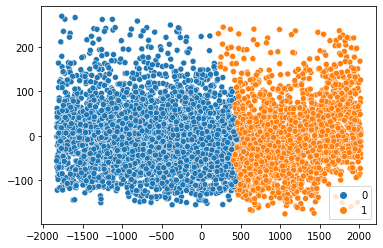

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(df_pca)

sns.scatterplot(df_pca[:, 0], df_pca[:,1], hue=agglomerative.labels_)
print(agglomerative.n_clusters_)
print(agglomerative.n_connected_components_)
plt.show()

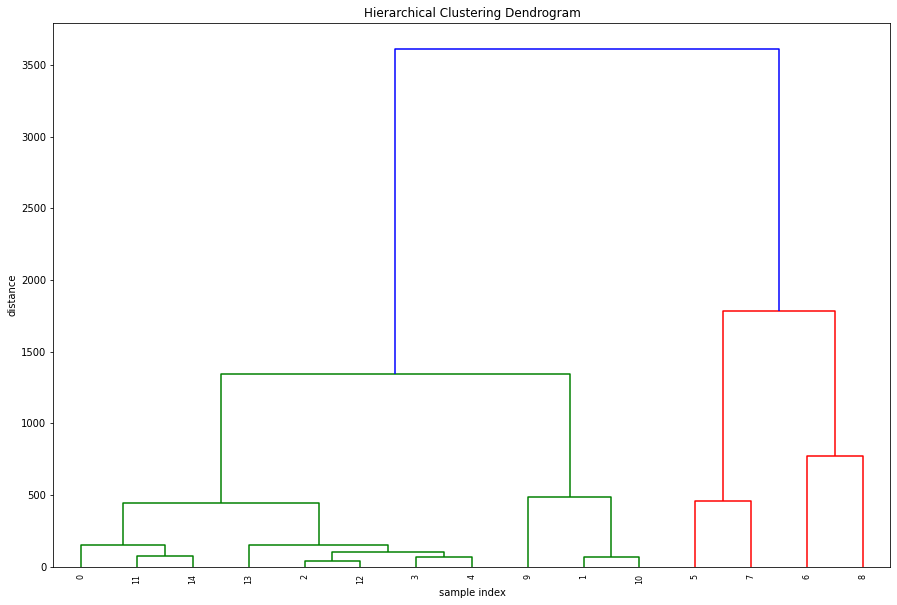

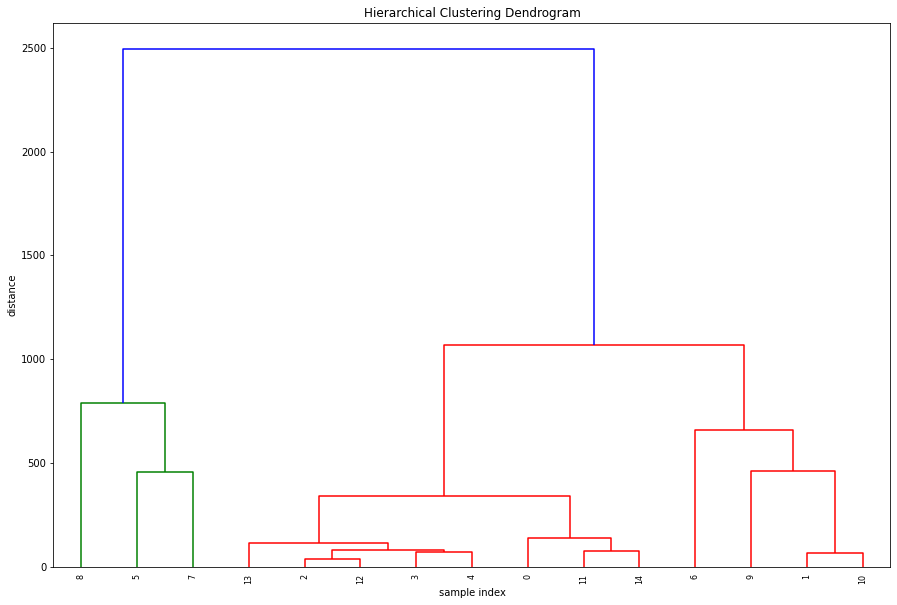

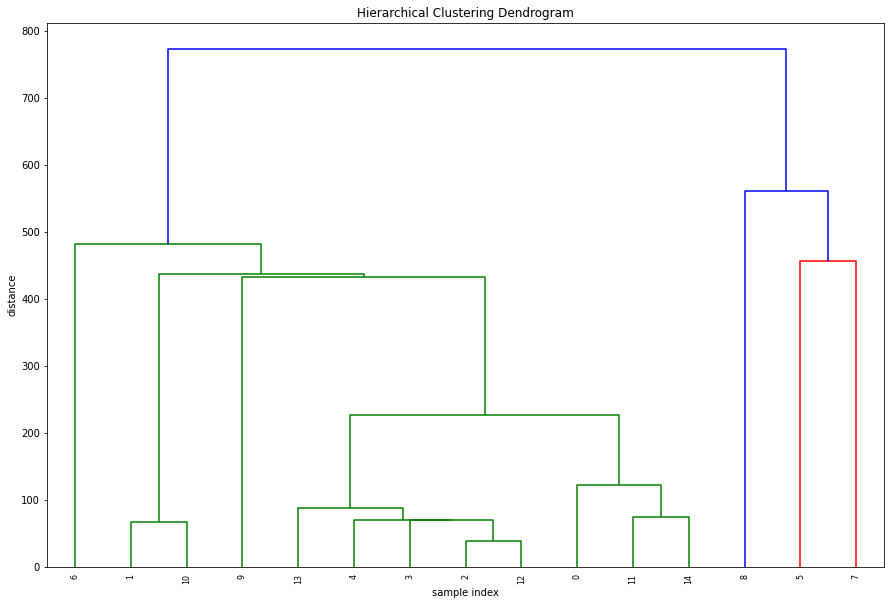

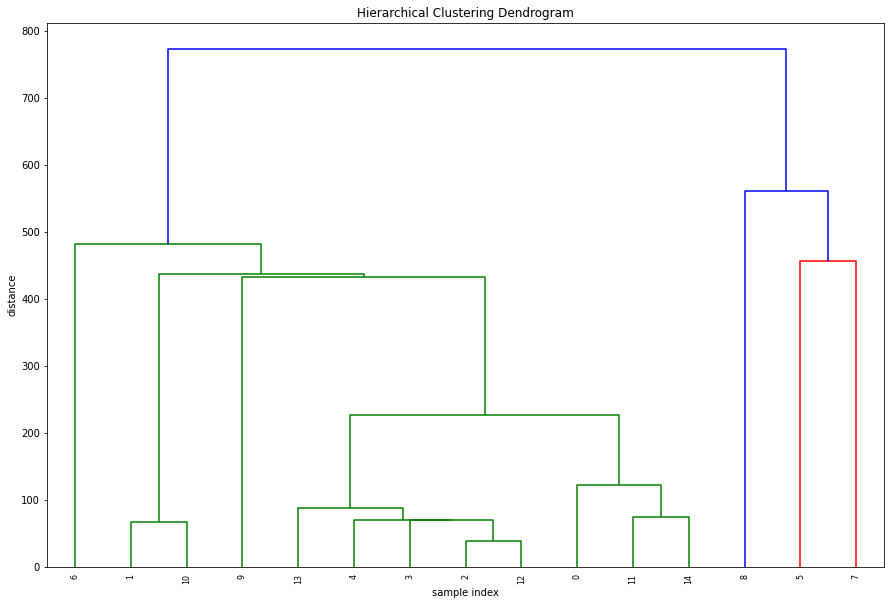

In [ ]:
linkage_types = ['complete', 'average', 'single']
for link_type in linkage_types:
  Z = linkage(df_pca[:15], link_type)
  
  plt.figure(figsize=(15, 10))
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('sample index')
  plt.ylabel('distance')
  
  dendrogram(Z, leaf_rotation=90., leaf_font_size=8.);
  plt.show();

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp');


In [ ]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering,DBSCAN

X = df_encoded[df_encoded.columns[:-1]]
y = df_encoded['stroke']

algorithms = []
algorithms.append(KMeans(n_clusters=2, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative','DBSCAN'])

results

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.004847,0.004752,0.012259,0.003130,0.004987
Affinity,0.000000,0.000000,0.000000,1.000000,0.000000
Spectral,0.005941,0.005049,0.012963,0.003318,0.005284
Agglomerative,0.008937,0.005736,0.014551,0.003758,0.005973
DBSCAN,0.000000,0.000000,0.000000,1.000000,0.000000


DBSCAN
--

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


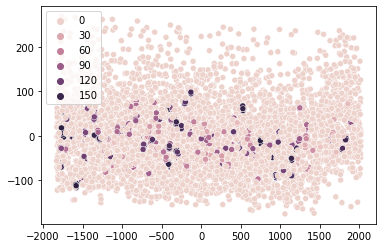

In [ ]:
dbscan = DBSCAN(eps=8, min_samples=4)
dbscan.fit(df_pca)

sns.scatterplot(df_pca[:, 0], df_pca[:, 1], hue=dbscan.labels_)
plt.show()